# Part 1: Causality
## Adapted from Data 8x

In [80]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Causality

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [81]:
bta = pd.read_csv('data//bta.csv')
bta

,Group,Result
0,Control,1.0
1,Control,1.0
2,Control,0.0
3,Control,0.0
4,Control,0.0
5,Control,0.0
6,Control,0.0
7,Control,0.0
8,Control,0.0
9,Control,0.0


In [67]:
#bta.group('Group')

In [68]:
bta.groupby('Group').sum()

,Result
Group,
Control,2.0
Treatment,9.0


In [69]:
bta.groupby('Group').mean()

,Result
Group,
Control,0.125
Treatment,0.600


In [70]:
observed_outcomes = pd.read_csv('data//observed_outcomes.csv')
observed_outcomes

,Group,Outcome if assigned treatment,Outcome if assigned control
0,Control,Unknown,1
1,Control,Unknown,1
2,Control,Unknown,0
3,Control,Unknown,0
4,Control,Unknown,0
5,Control,Unknown,0
6,Control,Unknown,0
7,Control,Unknown,0
8,Control,Unknown,0
9,Control,Unknown,0


In [71]:
bta 

,Group,Result
0,Control,1.0
1,Control,1.0
2,Control,0.0
3,Control,0.0
4,Control,0.0
5,Control,0.0
6,Control,0.0
7,Control,0.0
8,Control,0.0
9,Control,0.0


In [72]:
obs_proportions = bta.groupby('Group').mean().Result
obs_proportions

Group
Control      0.125
Treatment    0.600
Name: Result, dtype: float64

In [73]:
observed_distance = abs(obs_proportions[0] - obs_proportions[1])
observed_distance

0.475

In [74]:
bta

,Group,Result
0,Control,1.0
1,Control,1.0
2,Control,0.0
3,Control,0.0
4,Control,0.0
5,Control,0.0
6,Control,0.0
7,Control,0.0
8,Control,0.0
9,Control,0.0


In [75]:
labels = bta.Group
results = bta.Result

In [76]:
shuffled_results = results.sample(frac=1, replace=False).reset_index().Result
shuffled_tbl = pd.DataFrame(
                            {'Group': labels,
                             'Result': shuffled_results
                            })
proportions = shuffled_tbl.groupby('Group').mean().Result
new_distance = abs(proportions[0] - proportions[1])
new_distance

0.041666666666666685

In [77]:
distances = []

for i in np.arange(20000):
    shuffled_results = results.sample(frac=1, replace=False).reset_index().Result
    shuffled_tbl = pd.DataFrame({'Group': labels, 'Result': shuffled_results})
    proportions = shuffled_tbl.groupby('Group').mean().Result
    new_distance = abs(proportions[0] - proportions[1])
    distances = np.append(distances, new_distance)

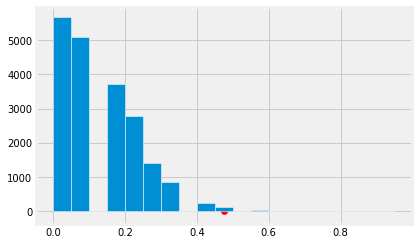

In [78]:
plots.hist(distances, bins=np.arange(0, 1, 0.05), ec='w')
plots.scatter(observed_distance, 0, color='red', s=40);

In [79]:
np.count_nonzero(distances >= observed_distance) / 20000

0.00955

# Part 2: Statistical Thinking Part 1
## Adapted from Datacamp course of the same name

In [1]:
def ecdf(s):
    x = np.sort(s)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

# Part 3: Statistical Thinking Part 2
## Adapted from Datacamp course of the same name

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [5]:
# part 2, chapter 1, page 10
df = pd.read_csv("data//michelson_speed_of_light.csv")
michelson_speed_of_light = df["velocity of light in air (km/s)"]
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)
samples = np.random.normal(mean, std, size=10000)

### CDF of michelson's measurements

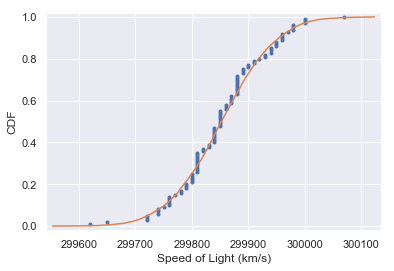

In [9]:
# part 2, chapter 1, page 11
x, y = ecdf(michelson_speed_of_light)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
plt.margins(0.02)
_ = plt.xlabel('Speed of Light (km/s)')
_ = plt.ylabel('CDF')

x2, y2 = ecdf(samples)
_ = plt.plot(x2, y2)
plt.show()

## Swing states election results

In [11]:
results = pd.read_csv("data//2008_swing_states.csv")

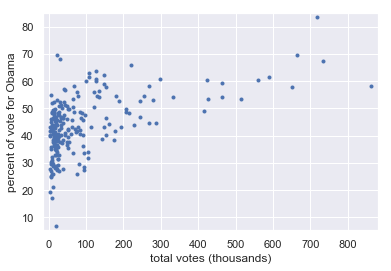

In [20]:
# page 19
_ = plt.plot(results['total_votes']/1000, results['dem_share'], marker = '.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

In [21]:
# add linear regression plot

In [22]:
# 2-1-24
total_votes = results['total_votes']/1000
dem_share = results['dem_share']
slope, intercept = np.polyfit(total_votes, dem_share, 1)
print(slope, intercept)

0.040370717009465595 40.11391196864176


## Bootstrap Replicates

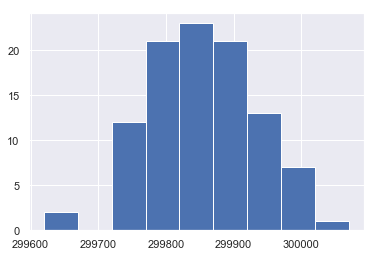

In [25]:
# 2-2-2
df = pd.read_csv("data//michelson_speed_of_light.csv")
michelson_speed_of_light = df["velocity of light in air (km/s)"]
plt.hist(michelson_speed_of_light, bins = 9)
plt.show()

In [30]:
# 2-2-13
bs_sample = np.random.choice(michelson_speed_of_light, size=100)
print("Bootstrap sample mean:   ", np.mean(bs_sample))

print("Bootstrap sample median: ", np.median(bs_sample))

print("Bootstrap sample STD:    ", np.std(bs_sample))

Bootstrap sample mean:    299852.7
Bootstrap sample median:  299850.0
Bootstrap sample STD:     77.30271664049071


In [31]:
# 2-2-16
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [51]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299857.3

In [53]:
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

C:\Users\gator\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


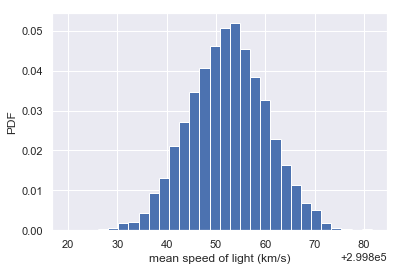

In [54]:
# 2-2-18
_ = plt.hist(bs_replicates, bins=30, normed=True)
_ = plt.xlabel('mean speed of light (km/s)')
_ = plt.ylabel('PDF')
plt.show()

In [55]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int)

[299837.1 299867.8]


## Pairs Bootstrap

In [58]:
# 2-2-27
results = pd.read_csv("data//2008_swing_states.csv")
total_votes = results['total_votes']
dem_share = results['dem_share']

inds = np.arange(len(total_votes))
bs_inds = np.random.choice(inds, len(inds))
bs_total_votes = total_votes[bs_inds]
bs_dem_share = dem_share[bs_inds]

# bs_slope, bs_intercept

print("Bootstrap: ", np.polyfit(bs_total_votes, bs_dem_share, 1))
print("Original:  ", np.polyfit(total_votes, dem_share, 1))

Bootstrap:  [4.28309388e-05 3.89709296e+01]
Original:   [4.0370717e-05 4.0113912e+01]


In [62]:
# 2-3-13
dem_share_PA = results[results.state == 'PA'].dem_share
dem_share_OH = results[results.state == 'OH'].dem_share
dem_share_both = np.concatenate((dem_share_PA, dem_share_OH))
dem_share_perm = np.random.permutation(dem_share_both)
perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
perm_sample_OH = dem_share_perm[len(dem_share_PA):]

In [64]:
# Are OH and PA different?
print(np.mean(perm_sample_PA) - np.mean(perm_sample_OH))
print(np.mean(dem_share_PA) - np.mean(dem_share_OH))

1.2334226594301185
1.1582360922659447
